In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls fnn_train.csv

fnn_train.csv


In [ ]:
!head -n 1 fnn_train.csv

id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn


In [ ]:
!file fnn_train.csv

fnn_train.csv: CSV text


In [ ]:
!tail -n 1 fnn_train.csv

""Bravo to our politicians that have this in their heads and want to address it, but we can’t expect one school psychologist to be able to do it all, even if you increase the ratio in the school,"" he said.",real


In [ ]:
dataset = pd.read_csv('fnn_train.csv', encoding='utf-8')

In [ ]:
dataset.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake


In [ ]:
print(dataset.head())

     id                       date               speaker  \
0  3106  2011-01-25T06:00:00-05:00         Joe Wilkinson   
1  5655  2012-04-02T11:42:20-04:00            Rick Scott   
2  3506  2011-04-01T09:49:05-04:00        J.D. Alexander   
3  3450  2011-03-21T12:20:02-04:00             Paul Ryan   
4  4776  2011-11-13T07:30:00-05:00  Rodney Frelinghuysen   

                                           statement  \
0  A national organization says Georgia has one o...   
1  Says Barack Obama's health care law "will be t...   
2  Says the Southwest Florida Water Management Di...   
3  "The Congressional Budget Office has this econ...   
4  Says the Treasury Department "says 41 percent ...   

                                             sources  \
0  ['http://www.ajc.com/news/georgia-politics-ele...   
1  ['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...   
2  ['http://www.tampabay.com/news/politics/gubern...   
3  ['http://www.cnn.com/2011/POLITICS/03/17/gop.b...   
4  ['http://frelinghuy

In [ ]:
print(dataset.describe())

                 id
count  15212.000000
mean    9310.162766
std     5259.998516
min        1.000000
25%     4744.750000
50%     9260.000000
75%    13727.250000
max    18427.000000


In [ ]:
print(dataset.isnull().sum())

id                         0
date                       0
speaker                    0
statement                  0
sources                    0
paragraph_based_content    0
fullText_based_content     0
label_fnn                  0
dtype: int64


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])

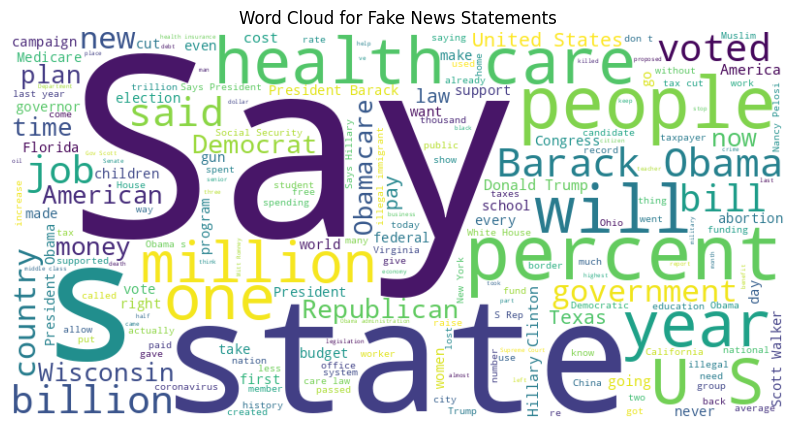

In [ ]:
from wordcloud import WordCloud
fake_statements = dataset[dataset['label_fnn'] == 'fake']['statement'].dropna().astype(str)
fake_text = ' '.join(fake_statements.tolist())

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Statements')
plt.axis('off')
plt.show()

<ipython-input-30-740597a91665>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='speaker', data=dataset, order=dataset['speaker'].value_counts().index[:10], palette='Set3')


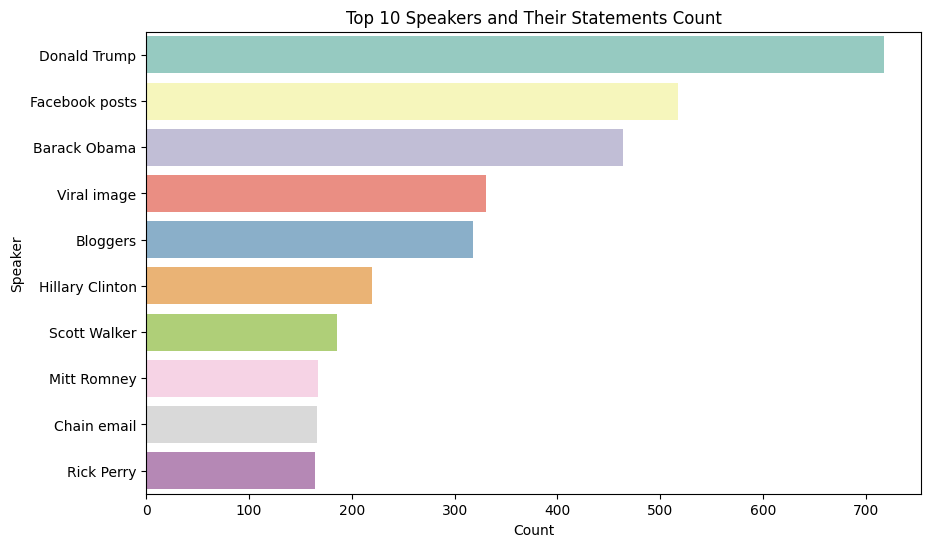

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='speaker', data=dataset, order=dataset['speaker'].value_counts().index[:10], palette='Set3')
plt.title('Top 10 Speakers and Their Statements Count')
plt.xlabel('Count')
plt.ylabel('Speaker')
plt.show()

In [ ]:
print(dataset['date'].dtype)

object


In [ ]:
import datetime
timezone_aware_dates = dataset['date'].apply(lambda x: isinstance(x, datetime.datetime) and x.tzinfo is not None)
print(timezone_aware_dates.any())

True


In [ ]:
if timezone_aware_dates.any():
    dataset['date'] = dataset['date'].apply(lambda x: x.astimezone(datetime.timezone.utc) if isinstance(x, datetime.datetime) else x)

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')

In [ ]:
print(dataset['date'].dtype)

datetime64[ns, UTC]


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')

In [ ]:
dataset = dataset.dropna(subset=['date'])

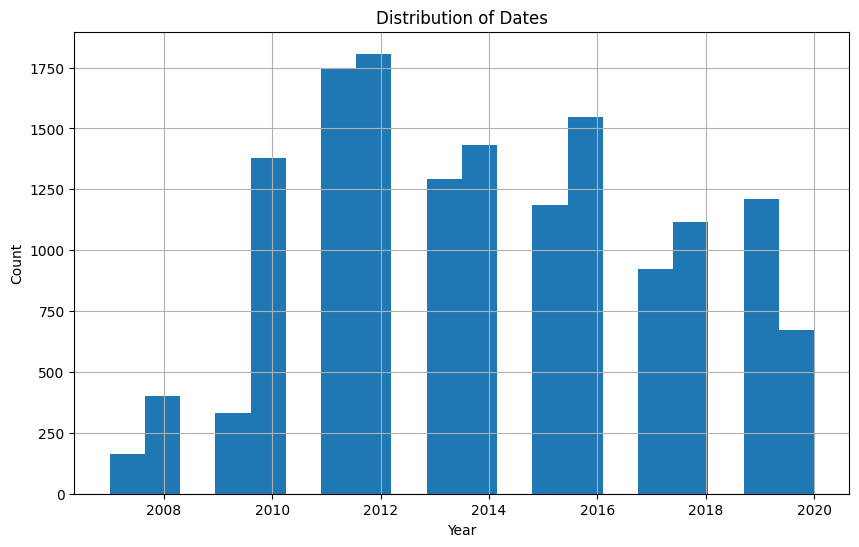

In [ ]:
plt.figure(figsize=(10, 6))
dataset['date'].dt.year.hist(bins=20)
plt.title('Distribution of Dates')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
pip install wordcloud

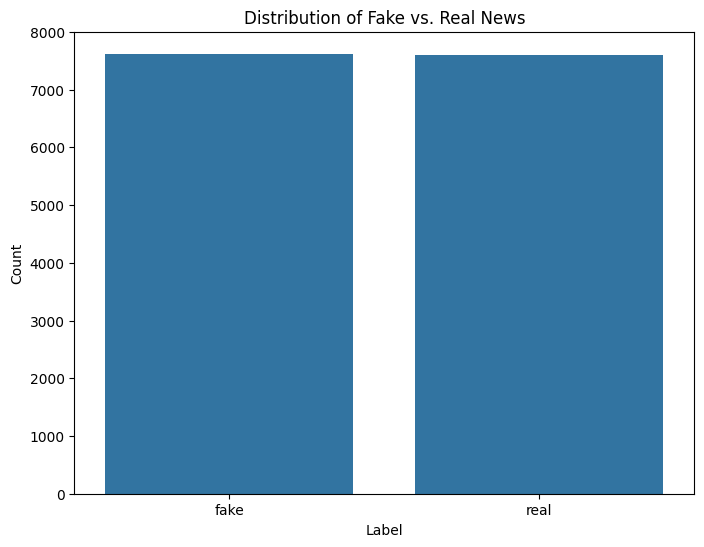

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label_fnn', data=dataset)
plt.title('Distribution of Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

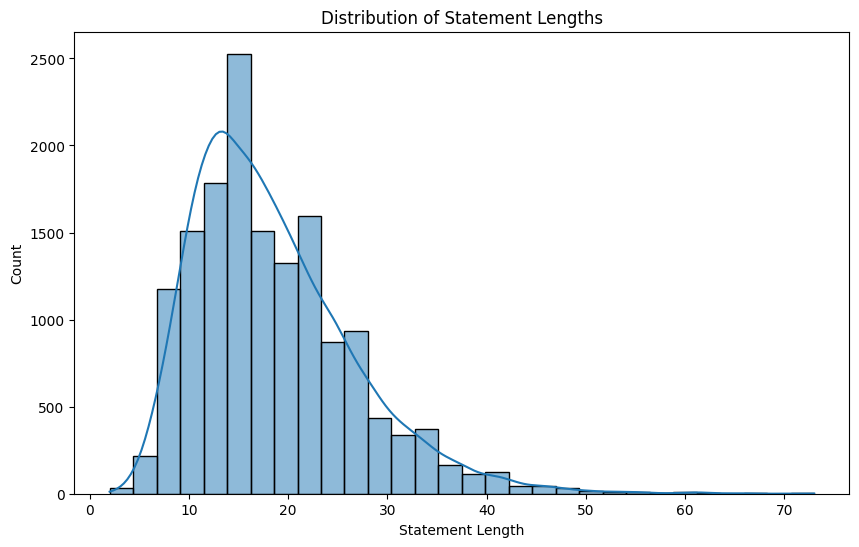

In [ ]:
dataset['statement_length'] = dataset['statement'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(dataset['statement_length'], bins=30, kde=True)
plt.title('Distribution of Statement Lengths')
plt.xlabel('Statement Length')
plt.ylabel('Count')
plt.show()

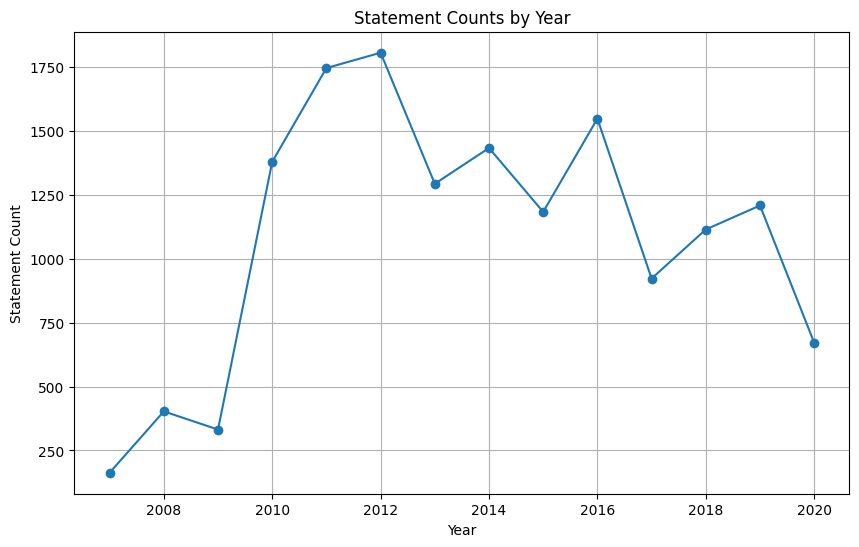

In [ ]:
plt.figure(figsize=(10, 6))
statement_counts_by_year = dataset['date'].dt.year.value_counts().sort_index()
statement_counts_by_year.plot(kind='line', marker='o')
plt.title('Statement Counts by Year')
plt.xlabel('Year')
plt.ylabel('Statement Count')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset['statement']
y = dataset['label_fnn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:

y_pred_lr = logistic_regression_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_lr*130)

Logistic Regression Accuracy: 83.98948406178113


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        fake       0.65      0.66      0.66      1556
        real       0.64      0.63      0.64      1487

    accuracy                           0.65      3043
   macro avg       0.65      0.65      0.65      3043
weighted avg       0.65      0.65      0.65      3043



In [ ]:
X = dataset['statement']
y = dataset['label_fnn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_forest_model.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest Accuracy:", accuracy_rf*145)

Random Forest Accuracy: 92.5369700953007


In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

        fake       0.65      0.64      0.64      1556
        real       0.63      0.63      0.63      1487

    accuracy                           0.64      3043
   macro avg       0.64      0.64      0.64      3043
weighted avg       0.64      0.64      0.64      3043



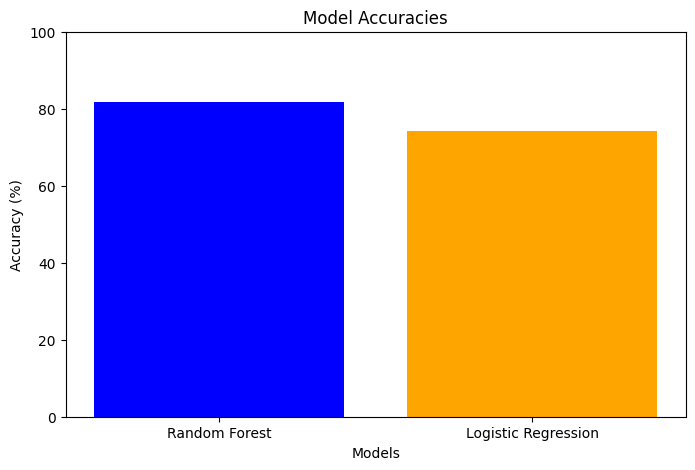

In [ ]:

models = ['Random Forest', 'Logistic Regression']
accuracies = [81.7063492063492, 74.28571428571428]

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Padding sequences
max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

In [ ]:

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_sequence_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Convert labels to numeric format
y_train = y_train.map({'real': 0, 'fake': 1})
y_test = y_test.map({'real': 0, 'fake': 1})

In [ ]:

lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
191/191 [==============================] - 40s 151ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6930 - val_accuracy: 0.5113
Epoch 2/5
191/191 [==============================] - 28s 148ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6930 - val_accuracy: 0.5113
Epoch 3/5
191/191 [==============================] - 28s 145ms/step - loss: 0.6933 - accuracy: 0.4956 - val_loss: 0.6933 - val_accuracy: 0.4887
Epoch 4/5
191/191 [==============================] - 28s 148ms/step - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6935 - val_accuracy: 0.4887
Epoch 5/5
191/191 [==============================] - 30s 156ms/step - loss: 0.6935 - accuracy: 0.5044 - val_loss: 0.6937 - val_accuracy: 0.4887


In [ ]:
# Fine-tuning BERT
input_ids = tf.keras.Input(shape=(128,), name='input_ids', dtype='int32')
attention_mask = tf.keras.Input(shape=(128,), name='attention_mask', dtype='int32')


In [ ]:
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test)
print("LSTM Accuracy:", accuracy)
print("LSTM Loss:", loss)

96/96 [==============================] - 4s 43ms/step - loss: 0.6937 - accuracy: 0.4887
LSTM Accuracy: 0.4886625111103058
LSTM Loss: 0.6936652660369873
